In [1]:
import os
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
def get_final_files(directory):
    final_file_paths = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith('.final'):
                file_path = os.path.join(root, file)
                final_file_paths.append(file_path)
    return final_file_paths

In [3]:
all_files_dev = get_final_files('../data/dev/')
all_files_test = get_final_files('../data/test/')
all_files_train = get_final_files('../data/train/')

In [4]:
all_files_dev

['../data/dev/2009\\2009-35-4-597-635.final',
 '../data/dev/2010\\2010-36-1-1-30.final',
 '../data/dev/2011\\2011-37-3-421-454.final',
 '../data/dev/2012\\2012-38-4-867-915.final',
 '../data/dev/2013\\2013-39-1-15–22.final',
 '../data/dev/2014\\2014-40-2-449-468.final',
 '../data/dev/2015\\2015-41-3-355-383.final',
 '../data/dev/2016\\2016-42-4-727-761.final',
 '../data/dev/2017\\2017-43-1-31-70.final',
 '../data/dev/2018\\2018-44-1-119-186.final',
 '../data/dev/2019\\2019-45-2-293-337.final',
 '../data/dev/2020\\2020-46-3-605-665.final',
 '../data/dev/2021\\2021-47-1-9-42.final',
 '../data/dev/2022\\2022-48-2-375-401.final',
 '../data/dev/2022\\2022-48-4-887-906.final',
 '../data/dev/2023\\2023-49-2-395-427.final',
 '../data/dev/2023\\2023-49-4-943-1001.final',
 '../data/dev/2024\\2024-50-2-419-473.final']

In [5]:
def read_all_files(file):
    df = pd.read_csv(file, on_bad_lines='skip',encoding='ISO-8859-1', sep=r'\t| +', engine='python', header=None)
    df = df.rename(columns={0: 'token', 1: 'label'})
    df = df.dropna(subset=['label'])
    df = df[['token', 'label']]
    return df

In [6]:
def display_wordcloud(df):
    text = ' '.join(df['token'])
    wordcloud = WordCloud(width=800, height=400).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [7]:
def count_entities(df):
    # Initialize variables to store entity counts
    entities = []
    current_entity = None

    # Iterate through the rows to group entities
    for i, row in df.iterrows():
        word, label = row["token"], row["label"]
        
        if label.startswith("B"):  # Beginning of a new entity
            if current_entity:  # If there was a previous entity, save it
                entities.append(current_entity)
            current_entity = [word]  # Start a new entity
        elif label.startswith("I") and current_entity is not None:  # Inside an entity
            current_entity.append(word)
        else:  # Not part of an entity (O label)
            if current_entity:  # Save the current entity if it exists
                entities.append(current_entity)
                current_entity = None

    # If there's an ongoing entity at the end, add it to the list
    if current_entity:
        entities.append(current_entity)

    # Count the occurrences of each entity
    entity_counts = Counter(tuple(entity) for entity in entities)

    return entity_counts

## Dev Dataset

In [8]:
dev_df = pd.concat([read_all_files(file) for file in all_files_dev])
dev_df.head(30)

,token,label
0,This,O
1,article,O
2,presents,O
3,an,O
4,investigation,O
5,of,O
6,corpus,B
7,based,O
8,methods,O
9,for,O


In [9]:
dev_df['label'].unique()

array(['O', 'B', 'I', 'b'], dtype=object)

In [10]:
dev_df['label'].replace('b', 'B', inplace=True)

In [11]:
dev_df['label'].unique()

array(['O', 'B', 'I'], dtype=object)

In [12]:
dev_df.isnull().sum()

token    0
label    0
dtype: int64

+ Count entities

In [13]:
count_entities_dev_df = count_entities(dev_df)
count_entities_dev_df

Counter({('corpus',): 3,
         ('automation',): 1,
         ('operational', 'dimensions'): 1,
         ('information', 'gathering', 'technique'): 1,
         ('granularity',): 2,
         ('information',): 3,
         ('information', 'gathering', 'techniques'): 1,
         ('retrieval',): 1,
         ('prediction',): 1,
         ('document', 'level'): 1,
         ('sentence', 'level'): 1,
         ('Document', 'level', 'methods'): 1,
         ('requests',): 2,
         ('Sentence', 'level', 'methods'): 1,
         ('extractive', 'multi', 'document', 'summarization', 'techniques'): 1,
         ('units',): 1,
         ('Evaluation',): 3,
         ('automate',): 1,
         ('generation',): 2,
         ('responses',): 1,
         ('substantial',): 1,
         ('meta', 'selection', 'process'): 1,
         ('inquiry',): 1,
         ('unified', 'response', 'automation', 'solution'): 1,
         ('syntactic', 'processing'): 2,
         ('short', '-', 'term', 'memory'): 1,
         ('storag

In [14]:
print("Top 10 most frequent entities in the dev set:")
for entity, count in count_entities_dev_df.most_common(10):
    print(f"{count}x {entity}")

Top 10 most frequent entities in the dev set:
8x ('parsing',)
6x ('crossing', 'dependencies')
6x ('AMR',)
5x ('ESA',)
5x ('LFG', 'grammar')
5x ('permutations',)
4x ('model',)
4x ('corpora',)
4x ('MRLs',)
3x ('corpus',)


In [15]:
totat_entities_dev_df = sum(count_entities_dev_df.values())
print(f'Total entities in dev dataset: {totat_entities_dev_df}')

Total entities in dev dataset: 394


+ Token Distribution

In [16]:
dev_df['token_length'] = dev_df['token'].apply(lambda x: len(x))
dev_df['token_length'].describe()

count    3292.000000
mean        5.111786
std         3.396732
min         1.000000
25%         2.000000
50%         4.000000
75%         8.000000
max        20.000000
Name: token_length, dtype: float64

+ Unique Words

In [17]:
unique_words = set(token for token in dev_df['token'].tolist())
print(len(unique_words))  # Number of unique words

1090


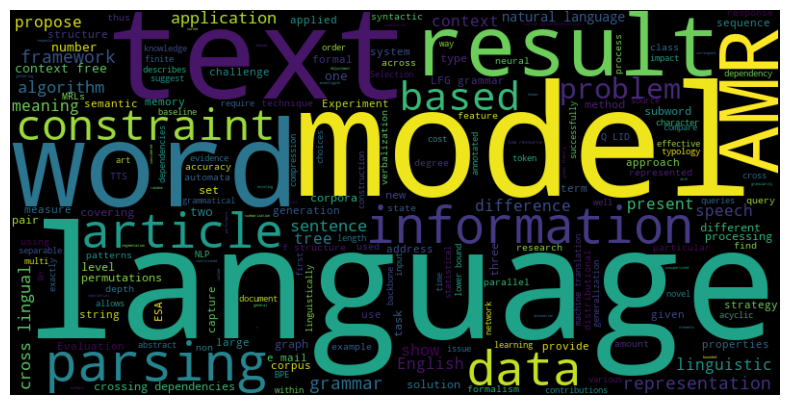

In [18]:
display_wordcloud(dev_df)


## Train Dataset

In [19]:
train_df = pd.concat([read_all_files(file) for file in all_files_train])
train_df.head()

,token,label
0,In,O
1,this,O
2,article,O
3,we,O
4,discuss,O


In [20]:
train_df['label'].unique()

array(['O', 'B', 'I', 'II', 'b'], dtype=object)

In [21]:
train_df['label'].replace({
    'II':'I',
    'b': 'B'
}, inplace=True)

In [22]:
train_df['label'].unique()

array(['O', 'B', 'I'], dtype=object)

In [23]:
train_df.isnull().sum()

token    0
label    0
dtype: int64

+ Count entities

In [24]:
count_entities_train_df = count_entities(train_df)
count_entities_train_df

Counter({('metrics', 'of', 'coherence'): 1,
         ('centering', 'theory'): 1,
         ('metrics',): 4,
         ('automatic', 'text', 'generation'): 1,
         ('metric',): 5,
         ('corpora',): 4,
         ('NOCB', 'transitions'): 1,
         ('baseline',): 8,
         ('centering', 'based', 'features'): 1,
         ('text', 'to', 'text'): 1,
         ('concept', 'to', 'text', 'generation', 'systems'): 1,
         ('machine', 'translation'): 8,
         ('MT',): 3,
         ('output',): 1,
         ('errors',): 2,
         ('translation', 'process'): 3,
         ('shifting',): 1,
         ('MT', 'paradigm'): 1,
         ('computer', 'assisted', 'translation'): 1,
         ('model',): 21,
         ('iterative', 'process'): 1,
         ('human', 'translator', 'activity'): 1,
         ('iteration',): 1,
         ('prefix',): 2,
         ('validated',): 1,
         ('accepted',): 1,
         ('amended',): 1,
         ('translation', 'suffix', 'hypothesis'): 1,
         ('framewor

In [25]:
print("Top 10 most frequent entities in the dev set:")
for entity, count in count_entities_train_df.most_common(10):
    print(f"{count}x {entity}")

Top 10 most frequent entities in the dev set:
28x ('models',)
21x ('model',)
18x ('NLP',)
15x ('parsing',)
14x ('data',)
12x ('state', '-', 'of', '-', 'the', '-', 'art')
12x ('algorithm',)
12x ('natural', 'language', 'processing')
12x ('data', 'sets')
11x ('features',)


In [26]:
total_entities_train_df = sum(count_entities_train_df.values())
print(f'Total entities in train dataset: {total_entities_train_df}')

Total entities in train dataset: 3248


+ Token Distribution

In [27]:
train_df['token_length'] = train_df['token'].apply(lambda x: len(x))
train_df['token_length'].describe()

count    26742.000000
mean         5.180353
std          3.361480
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         44.000000
Name: token_length, dtype: float64

+ Unique words

In [28]:
unique_words_train_df = len(set(token for token in train_df['token'].tolist()))
print(unique_words_train_df)

3863


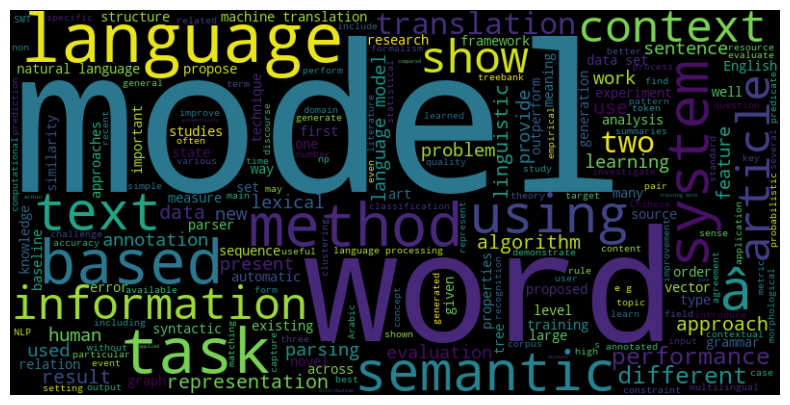

In [29]:
display_wordcloud(train_df)

## Test Dataset

In [30]:
test_df = pd.concat([read_all_files(file) for file in all_files_test])
test_df.head()

,token,label
0,Systems,O
1,based,O
2,on,O
3,synchronous,B
4,grammars,I


In [31]:
test_df['label'].unique()

array(['O', 'B', 'I', '0', 'o', 'i'], dtype=object)

In [32]:
test_df['label'].replace({
    '0': 'O',
    'o': 'O',
    'i': 'I'
}, inplace=True)


In [33]:
test_df['label'].unique()

array(['O', 'B', 'I'], dtype=object)

In [34]:
test_df.isnull().sum()

token    0
label    0
dtype: int64

+ Count entities

In [35]:
count_entities_test_df = count_entities(test_df)
count_entities_test_df

Counter({('synchronous', 'grammars'): 1,
         ('tree',): 1,
         ('transducers',): 1,
         ('statistical', 'machine', 'translation', 'output'): 1,
         ('computationally',): 2,
         ('complexity',): 1,
         ('exponential',): 1,
         ('grammar', 'rules'): 1,
         ('arbitrary',): 1,
         ('binarization',): 1,
         ('synchronous', 'context', 'free', 'grammars'): 1,
         ('linear', 'time', 'algorithm'): 1,
         ('binarizing',): 1,
         ('synchronous', 'rules'): 1,
         ('binarizable',): 1,
         ('binarized', 'rule'): 1,
         ('speed',): 1,
         ('accuracy',): 2,
         ('syntax',): 1,
         ('machine', 'translation', 'system'): 1,
         ('parsing', 'strategies'): 1,
         ('binarizable', 'rules'): 1,
         ('polynomial', 'time', 'algorithm'): 1,
         ('NLP', 'applications'): 1,
         ('semantic', 'distance'): 2,
         ('distributional', 'distance'): 1,
         ('implicit', 'semantic', 'distance'): 

In [36]:
print("Top 10 most frequent entities in the test set:")
for entity, count in count_entities_test_df.most_common(10):
    print(f"{count}x {entity}")

Top 10 most frequent entities in the test set:
8x ('NER',)
7x ('Arabic',)
6x ('polysemy',)
5x ('string', 'kernels')
5x ('embeddings',)
4x ('deverbal', 'nominalizations')
4x ('ADN', '-', 'Classiï¬\x81er')
4x ('phrase', 'tables')
4x ('native', 'language', 'identification')
3x ('linguistic', 'variation')


In [37]:
total_entities_test_df = sum(count_entities_test_df.values())
print(f'Total entities in test dataset: {total_entities_test_df}')

Total entities in test dataset: 445


+ Token distribution

In [38]:
test_df['token_length'] = test_df['token'].apply(lambda x: len(x))
test_df['token_length'].describe()

count    3899.000000
mean        5.304437
std         3.356133
min         1.000000
25%         2.000000
50%         5.000000
75%         8.000000
max        17.000000
Name: token_length, dtype: float64

+ Unique words

In [39]:
unique_words_test_df = len(set(token for token in test_df['token'].tolist()))
print(unique_words_test_df)

1181


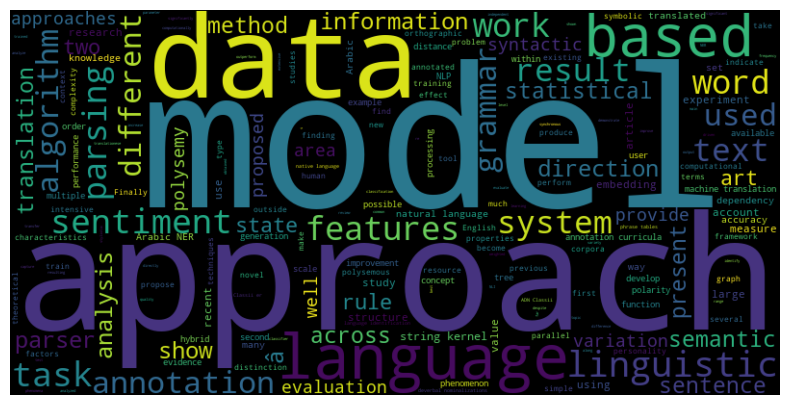

In [40]:
display_wordcloud(test_df)

## Save cleaned data to cleaned data folder

In [41]:
dev_df.to_csv('../data/cleaned_data/cleaned_data_dev.csv', index=False)
print("Saved cleaned dev data to cleaned_data folder")


Saved cleaned dev data to cleaned_data folder


In [42]:
train_df.to_csv('../data/cleaned_data/cleaned_data_train.csv', index=False)
print("Saved cleaned train data to cleaned_data folder")

Saved cleaned train data to cleaned_data folder


In [43]:
test_df.to_csv('../data/cleaned_data/cleaned_data_test.csv', index=False)
print("Saved cleaned test data to cleaned_data folder")

Saved cleaned test data to cleaned_data folder
